<a href="https://colab.research.google.com/github/bathicodes/EXPERIMENTS/blob/main/ANN_for_penguin_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook contains all the necessary steps to build a ANN based penguin classification model. Dataset can be found on data professor's GitHub page. Visit this [link](https://raw.githubusercontent.com/dataprofessor/data/master/penguins_cleaned.csv) for grab the raw dataset. EDA for this dataset can find [here](https://github.com/bathicodes/EXPERIMENTS/blob/main/EDA_Penguins.ipynb)

---



## Import libraries

In [326]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Import dataset

In [327]:
dataset = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/penguins_cleaned.csv')
x = dataset.drop('species', axis=1)
y = dataset['species']

In [328]:
x = np.array(x)
x

array([['Torgersen', 39.1, 18.7, 181, 3750, 'male'],
       ['Torgersen', 39.5, 17.4, 186, 3800, 'female'],
       ['Torgersen', 40.3, 18.0, 195, 3250, 'female'],
       ...,
       ['Dream', 49.6, 18.2, 193, 3775, 'male'],
       ['Dream', 50.8, 19.0, 210, 4100, 'male'],
       ['Dream', 50.2, 18.7, 198, 3775, 'female']], dtype=object)

In [329]:
y = np.array(y)
y

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adel

## Data pre-processing

### Encoding categorical data columns using OneHotEncoder

In [330]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [331]:
print(x)

[[0.0 0.0 1.0 ... 181 3750 'male']
 [0.0 0.0 1.0 ... 186 3800 'female']
 [0.0 0.0 1.0 ... 195 3250 'female']
 ...
 [0.0 1.0 0.0 ... 193 3775 'male']
 [0.0 1.0 0.0 ... 210 4100 'male']
 [0.0 1.0 0.0 ... 198 3775 'female']]


### Label encoding for Gender using LabelEncoder

In [332]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x[:,7] = le.fit_transform(x[:,7])

In [333]:
print(x)

[[0.0 0.0 1.0 ... 181 3750 1]
 [0.0 0.0 1.0 ... 186 3800 0]
 [0.0 0.0 1.0 ... 195 3250 0]
 ...
 [0.0 1.0 0.0 ... 193 3775 1]
 [0.0 1.0 0.0 ... 210 4100 1]
 [0.0 1.0 0.0 ... 198 3775 0]]


### Encoding Y with LabelEncoder

In [334]:
y = le.fit_transform(y)

## Splitting dataset as training and testing set

In [335]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

## Feature scaling

In [336]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Creating artificial Neural Network model architecture

### Creating a sequential method

In [337]:
ann = tf.keras.models.Sequential()

### Adding first hidden layer

In [338]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding second hidden layer

In [339]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding output layer

In [340]:
ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))

### Compiling model

In [341]:
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training model on training data

In [347]:
from tensorflow import keras
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('penguin.h5', monitor='loss', verbose=1, save_best_only=True)

history = ann.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[checkpoint])

Epoch 1/100
1/7 [===>..........................] - ETA: 0s - loss: 0.0189 - accuracy: 1.0000
Epoch 1: loss improved from inf to 0.02625, saving model to penguin.h5
7/7 [==============================] - 0s 6ms/step - loss: 0.0262 - accuracy: 1.0000
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 0.0315 - accuracy: 1.0000
Epoch 2: loss improved from 0.02625 to 0.02568, saving model to penguin.h5
7/7 [==============================] - 0s 7ms/step - loss: 0.0257 - accuracy: 1.0000
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 0.0269 - accuracy: 1.0000
Epoch 3: loss improved from 0.02568 to 0.02505, saving model to penguin.h5
7/7 [==============================] - 0s 7ms/step - loss: 0.0251 - accuracy: 1.0000
Epoch 4/100
1/7 [===>..........................] - ETA: 0s - loss: 0.0275 - accuracy: 1.0000
Epoch 4: loss improved from 0.02505 to 0.02446, saving model to penguin.h5
7/7 [==============================] - 0s 7ms/step - loss: 0.0245 - accuracy:

## Histograms

In [343]:
print(ann.history.history.keys())

dict_keys(['loss', 'accuracy'])


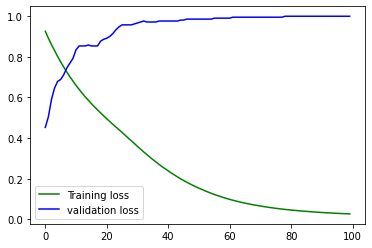

In [344]:
import matplotlib.pyplot as plt

loss_train = history.history['loss']
accuracy = history.history['accuracy']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(accuracy, 'b', label='validation loss')
plt.legend()
plt.show()

## Validation test set

In [345]:
y_pred = ann.predict(x_test)
new_y = []
for i in y_pred:
  new_y_pred = np.argmax(i)
  new_y.append(new_y_pred)

y_pred_value = np.array(new_y)

print(np.concatenate((y_test.reshape(len(y_test),1),y_pred_value.reshape(len(y_pred_value),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [2 2]]


## Making confusion matrix and accuracy score

In [346]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred_value)
print(cm)
ac = accuracy_score(y_test, y_pred_value)
print(ac)

[[39  0  0]
 [ 0 10  0]
 [ 0  0 18]]
1.0
